# 数据清洗
## import train data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
%matplotlib inline

In [100]:
#data
data_train=pd.read_csv('flight_delays_train.csv')
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [101]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


## 数据修改（1）

In [102]:
#提取月份，日期和周
data_train['Month'] = data_train['Month'].str[2:].astype('int')
data_train['DayofMonth'] = data_train['DayofMonth'].str[2:].astype('int')
data_train['DayOfWeek'] = data_train['DayOfWeek'].str[2:].astype('int')

#把Y转换成0，1
target_dict={'N':0,'Y':1}
data_train['dep_delayed_15min']=data_train['dep_delayed_15min'].map(target_dict)

#提取具体起飞小时，分钟
data_train['DepTime_hour']=data_train['DepTime']//100
data_train['DepTime_min']=data_train['DepTime']%100

#将时间分割成早中晚三部分
def hour_to_mae(x):
    if (x>6) & (x<12):
        return 'Morning'
    elif (x>12) & (x<18):
        return 'Afternoon'
    else:
        return 'Night'

data_train['mae']=data_train['DepTime_hour'].map(hour_to_mae)

In [103]:
#查看现在的数据
data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,mae
0,8,21,7,1934,AA,ATL,DFW,732,0,19,34,Night
1,4,20,3,1548,US,PIT,MCO,834,0,15,48,Afternoon
2,9,2,5,1422,XE,RDU,CLE,416,0,14,22,Afternoon
3,11,25,6,1015,OO,DEN,MEM,872,0,10,15,Morning
4,10,7,6,1828,WN,MDW,OMA,423,1,18,28,Night


## 查看数据分布

Text(0, 0.5, 'Distance')

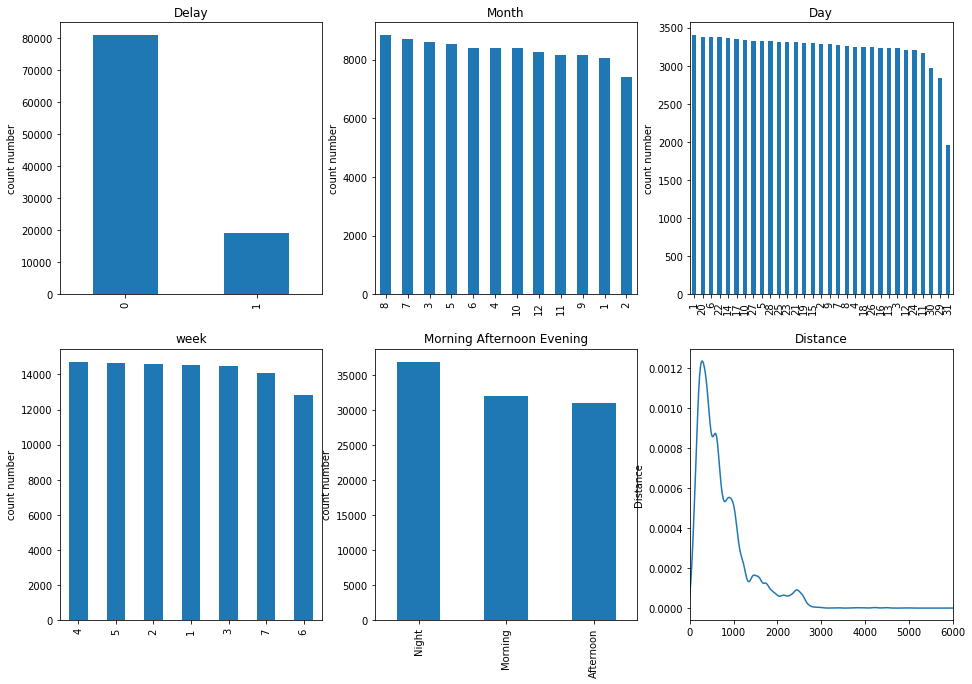

In [104]:
fig = plt.figure(figsize=(16,11))
fig.set(alpha=0.2) 

plt.subplot2grid((2,3),(0,0))   
data_train.dep_delayed_15min.value_counts().plot(kind='bar')
plt.title('Delay')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,1))   
data_train.Month.value_counts().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(0,2))   
data_train.DayofMonth.value_counts().plot(kind='bar')
plt.title('Day')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,0))   
data_train.DayOfWeek.value_counts().plot(kind='bar')
plt.title('week')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,1))   
data_train.mae.value_counts().plot(kind='bar')
plt.title('Morning Afternoon Evening')
plt.ylabel('count number')  

plt.subplot2grid((2,3),(1,2))   
data_train.Distance.plot(kind='kde',xlim=[0,6000])
plt.title('Distance')
plt.ylabel('Distance') 

## 观察各个特征和延误的大致关系

### 月份

<Figure size 576x576 with 0 Axes>

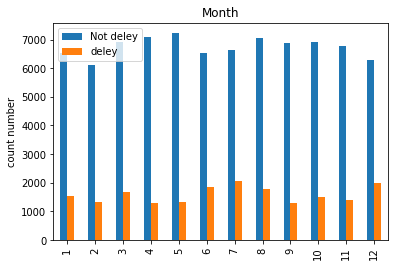

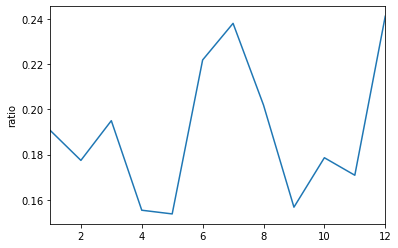

In [105]:
#月份
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_month={}
for month in range(1,13):
    deley_month[month]=data_train.dep_delayed_15min[data_train.Month==month].value_counts()

deley_month=pd.DataFrame(deley_month)

deley_month.transpose().plot(kind='bar')
plt.title('Month')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_month=deley_month.loc[1]/deley_month.sum()
plt.ylabel('ratio')
rate_month.plot()

### 天数

<Figure size 576x576 with 0 Axes>

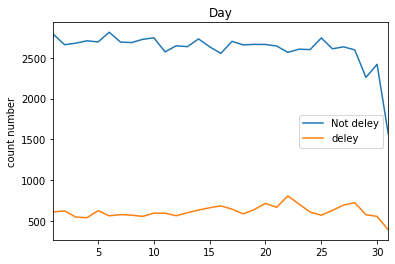

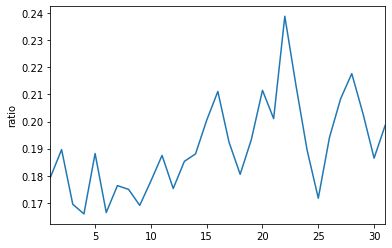

In [106]:
#天数
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_day={}
for day in range(1,32):
    deley_day[day]=data_train.dep_delayed_15min[data_train.DayofMonth==day].value_counts()

deley_day=pd.DataFrame(deley_day)

deley_day.transpose().plot(kind='line')
plt.title('Day')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_day=deley_day.loc[1]/deley_day.sum()
plt.ylabel("ratio")
rate_day.plot()

### 周

<Figure size 576x576 with 0 Axes>

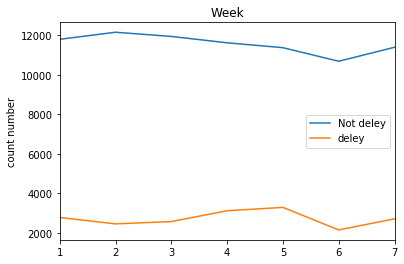

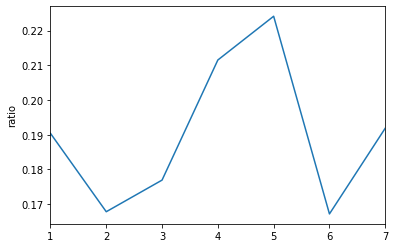

In [107]:
#week
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_week={}
for week in range(1,8):
    deley_week[week]=data_train.dep_delayed_15min[data_train.DayOfWeek==week].value_counts()

deley_week=pd.DataFrame(deley_week)

deley_week.transpose().plot(kind='line')
plt.title('Week')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_week=deley_week.loc[1]/deley_week.sum()
plt.ylabel("ratio")
rate_week.plot()

### 早中晚mae的差别

<Figure size 576x576 with 0 Axes>

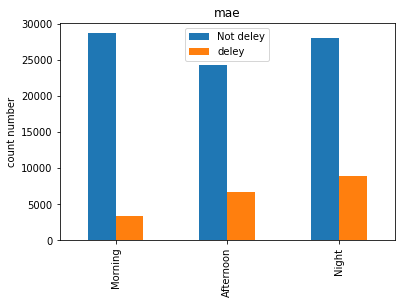

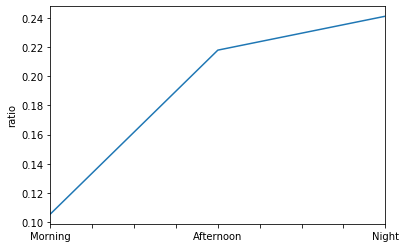

In [108]:
#mae
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 
deley_mae={}
for mae in ['Morning','Afternoon','Night']:
    deley_mae[mae]=data_train.dep_delayed_15min[data_train.mae==mae].value_counts()

deley_mae=pd.DataFrame(deley_mae)

deley_mae.transpose().plot(kind='bar')
plt.title('mae')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

fig = plt.figure()
rate_mae=deley_mae.loc[1]/deley_mae.sum()
plt.ylabel('ratio')
rate_mae.plot()

### 距离

,deley,not deley
count,19044.000000,80956.000000
mean,726.157740,730.159198
std,544.388349,581.500132
min,30.000000,31.000000
25%,328.000000,316.000000
50%,589.000000,569.000000
75%,954.000000,957.000000
max,4962.000000,4962.000000


<Figure size 576x576 with 0 Axes>

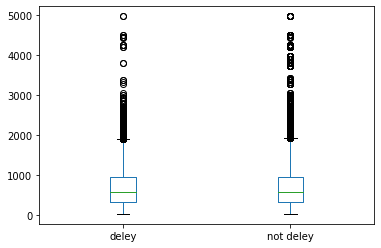

In [109]:
#距离
fig = plt.figure(figsize=(8,8))
fig.set(alpha=0.2) 

distance_deley=data_train.Distance[data_train.dep_delayed_15min==1]
distance_notdeley=data_train.Distance[data_train.dep_delayed_15min==0]

dis=pd.DataFrame({'deley':distance_deley,'not deley':distance_notdeley})
dis.plot(kind='box')
dis.describe()

## 因子
### data_train

In [110]:
dummies_mae=pd.get_dummies(data_train['mae'],prefix='mae')
dummies_Origin=pd.get_dummies(data_train['Origin'],prefix='Origin')
dummies_Dest=pd.get_dummies(data_train['Dest'],prefix='Dest')
dummies_UniqueCarrier=pd.get_dummies(data_train['UniqueCarrier'],prefix='UniqueCarrier')

data_train=pd.concat([data_train,dummies_mae,dummies_Origin,dummies_Dest,dummies_UniqueCarrier],axis=1)
data_train.drop(['mae'],inplace=True,axis=1)
data_train.drop(['UniqueCarrier'],inplace=True,axis=1)

data_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,Origin,Dest,Distance,dep_delayed_15min,DepTime_hour,DepTime_min,...,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TZ,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,8,21,7,1934,ATL,DFW,732,0,19,34,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,PIT,MCO,834,0,15,48,...,0,0,0,0,0,0,1,0,0,0
2,9,2,5,1422,RDU,CLE,416,0,14,22,...,0,0,0,0,0,0,0,0,1,0
3,11,25,6,1015,DEN,MEM,872,0,10,15,...,0,0,0,1,0,0,0,0,0,0
4,10,7,6,1828,MDW,OMA,423,1,18,28,...,0,0,0,0,0,0,0,1,0,0


## 转出大机场小机场(2)(3)

In [111]:
airport=pd.read_csv('airport_nonull.csv')
#所有出现过的机场
place=set(data_train['Dest'].values)|set(data_train['Origin'].values)
#建立转换字典
place2type={airport.iata_code.values[i]:airport.type.values[i] for i in range(9120) if airport.iata_code.values[i] in place}

data_train['Dest_type']=data_train['Dest'].map(place2type)
data_train['Origin_type']=data_train['Origin'].map(place2type)

dummies_train_Dest=pd.get_dummies(data_train['Dest_type'],prefix='Dest_type')
dummies_train_Origin=pd.get_dummies(data_train['Origin_type'],prefix='Origin_type')
data_train=pd.concat([data_train,dummies_train_Dest,dummies_train_Origin],axis=1)

#data_train.drop(['Dest_type'],inplace=True,axis=1)
#data_train.drop(['Origin_type'],inplace=True,axis=1)
data_train.drop(['Origin'],inplace=True,axis=1)
data_train.drop(['Dest'],inplace=True,axis=1)

### 绘图比较机场大小的影响

<Figure size 432x288 with 0 Axes>

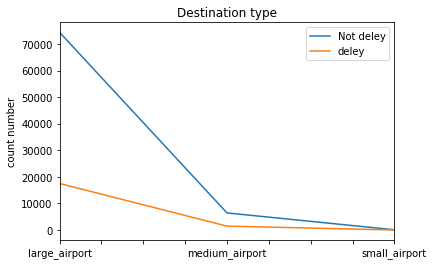

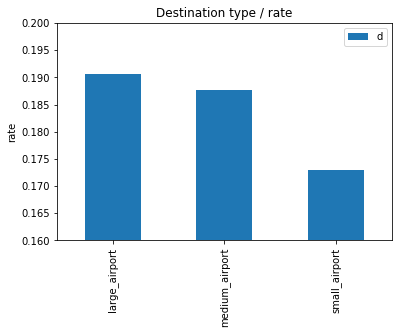

In [112]:
plt.figure()
deley_dest={}
for tp in ['large_airport','medium_airport','small_airport']:
    deley_dest[tp]=data_train.dep_delayed_15min[data_train.Dest_type==tp].value_counts()

deley_dest=pd.DataFrame(deley_dest)

deley_dest.transpose().plot()
plt.title('Destination type')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

plt.figure()
rate_dest=deley_dest.loc[1]/deley_dest.sum()
rate_dest.plot(kind='bar',ylim=[0.16,0.2])
plt.title('Destination type / rate')
plt.ylabel('rate')  
plt.legend('delay rate')

<Figure size 432x288 with 0 Axes>

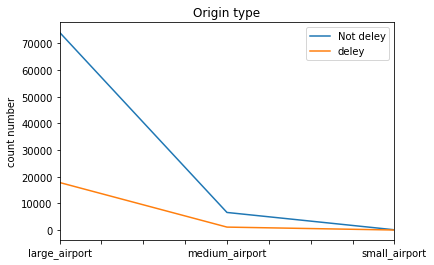

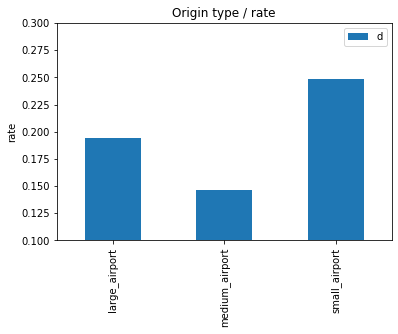

In [113]:
plt.figure()
deley_orign={}
for tp in ['large_airport','medium_airport','small_airport']:
    deley_orign[tp]=data_train.dep_delayed_15min[data_train.Origin_type==tp].value_counts()

deley_orign=pd.DataFrame(deley_orign)

deley_orign.transpose().plot()
plt.title('Origin type')
plt.ylabel('count number')  
plt.legend(['Not deley','deley'])

plt.figure()
rate_orign=deley_orign.loc[1]/deley_orign.sum()
rate_orign.plot(kind='bar',ylim=[0.1,0.3])
plt.title('Origin type / rate')
plt.ylabel('rate')  
plt.legend('delay rate')

In [114]:
data_train.drop(['Dest_type'],inplace=True,axis=1)
data_train.drop(['Origin_type'],inplace=True,axis=1)

**现在data_train拥有的数据：**  
1.Month    
2.DayofMonth    
3.DayOfWeek    
4.DepTime    
5.UniuqeCarrier_  
6.Origin_  
7.Dest_  
8.Distance    
9.dep_delayed_15min  
10.DepTime_hour  
11.DepTime_min  
12.Dest_type_  
13.Origin_type_  
14.mae_

In [115]:
data_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 617 columns):
Month                         int32
DayofMonth                    int32
DayOfWeek                     int32
DepTime                       int64
Distance                      int64
dep_delayed_15min             int64
DepTime_hour                  int64
DepTime_min                   int64
mae_Afternoon                 uint8
mae_Morning                   uint8
mae_Night                     uint8
Origin_ABE                    uint8
Origin_ABI                    uint8
Origin_ABQ                    uint8
Origin_ABY                    uint8
Origin_ACK                    uint8
Origin_ACT                    uint8
Origin_ACV                    uint8
Origin_ACY                    uint8
Origin_ADK                    uint8
Origin_ADQ                    uint8
Origin_AEX                    uint8
Origin_AGS                    uint8
Origin_AKN                    uint8
Origin_ALB               

# 决策树
## holdout method

In [116]:
from sklearn.model_selection import train_test_split

X=data_train.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance')
y=data_train.dep_delayed_15min

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

## 小树拟合看看情况

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

cmatrix_clf1 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

In [142]:
cmatrix_clf1
#行是预测的
#列是实际的
#那么实际上我们多把没延误的搞成延误的了，但是我觉着没关系- -。。。

array([[12540, 11747],
       [ 1820,  3893]], dtype=int64)

In [143]:
np.bincount(y_test)

array([24287,  5713], dtype=int64)

In [145]:
from sklearn.metrics import recall_score
rs_org=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps_org=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1_org=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs_org,'\n precision_score : ',ps_org,'\n f1_score : ',f1_org)

 recall_score :  0.6814283213723088 
 precision_score :  0.24891304347826088 
 f1_score :  0.36463260431789446


## 不对比不知道balance多重要……MD

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100)
clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

cmatrix_clf1 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
from sklearn.metrics import recall_score
rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs,'\n precision_score : ',ps,'\n f1_score : ',f1)

 recall_score :  0.005251181515841064 
 precision_score :  0.410958904109589 
 f1_score :  0.010369858278603525


## 添加特征
**目前已经有的特征是：**

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
Month                         100000 non-null int32
DayofMonth                    100000 non-null int32
DayOfWeek                     100000 non-null int32
Distance                      100000 non-null int64
mae_Afternoon                 100000 non-null uint8
mae_Morning                   100000 non-null uint8
mae_Night                     100000 non-null uint8
Dest_type_large_airport       100000 non-null uint8
Dest_type_medium_airport      100000 non-null uint8
Dest_type_small_airport       100000 non-null uint8
Origin_type_large_airport     100000 non-null uint8
Origin_type_medium_airport    100000 non-null uint8
Origin_type_small_airport     100000 non-null uint8
dtypes: int32(3), int64(1), uint8(9)
memory usage: 2.8 MB


**需要测试的是：**  
1.UniuqeCarrier_  
2.Origin_  
3.Dest_  
4.DepTime  
5.DepTime_hour  
6.DepTime_min  

In [147]:
X_add, X_test, y_add, y_test = train_test_split(data_train, y, test_size=0.3, random_state=123,stratify=y)

X_train_1=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_test_1=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_train_2=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_test_2=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_train_3=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_test_3=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_train_4=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_test_4=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_train_5=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_test_5=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_train_6=X_add.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')
X_test_6=X_test.filter(regex='mae_.*|Origin_type.*|Dest_type.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')

y=data_train.dep_delayed_15min

addlist=[X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6]
addtest=[X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6]

add_recall=[]
add_precision=[]
add_f1=[]

for X_train,X_test in zip(addlist,addtest):
    
    clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
    add_recall.append(rs)
    
    ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_precision.append(ps)
    
    f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_f1.append(f1)

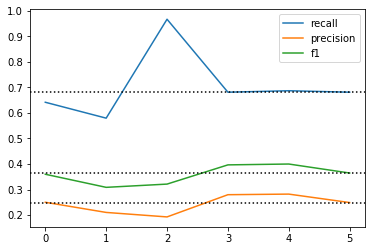

In [164]:
plt.figure()
plt.plot(add_recall)
plt.plot(add_precision)
plt.plot(add_f1)
plt.legend(['recall','precision','f1'])

plt.axhline(y=rs_org,color='black', linestyle=':')
plt.axhline(y=ps_org,color='black', linestyle=':')
plt.axhline(y=f1_org,color='black', linestyle=':')

结论应该是添加Dest_应该挺好的
## 突发奇想合并起始点和终点的机场大小

In [168]:
data_type=data_train.filter(regex='Origin_type.*|Dest_type.*')
type_large=data_type['Origin_type_large_airport']+data_type['Dest_type_large_airport']
type_medium=data_type['Origin_type_medium_airport']+data_type['Dest_type_medium_airport']
type_small=data_type['Origin_type_small_airport']+data_type['Dest_type_small_airport']

In [171]:
data_train['ctype_large']=type_large
data_train['ctype_medium']=type_medium
data_train['ctype_small']=type_small

In [176]:
from sklearn.model_selection import train_test_split

X=data_train.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance')
y=data_train.dep_delayed_15min

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,max_features=5,max_leaf_nodes=100,class_weight='balanced')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import recall_score
rs_c=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import precision_score
ps_c=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
from sklearn.metrics import f1_score
f1_c=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

print(' recall_score : ',rs_c,'\n precision_score : ',ps_c,'\n f1_score : ',f1_c)

 recall_score :  0.6915806056362681 
 precision_score :  0.24794477565108253 
 f1_score :  0.3650221729490022


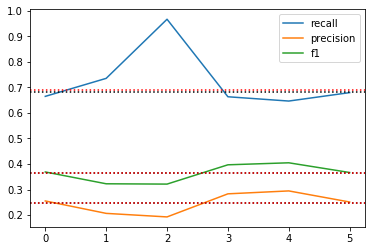

In [178]:
X_add, X_test, y_add, y_test = train_test_split(data_train, y, test_size=0.3, random_state=123,stratify=y)

X_train_1=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_test_1=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|UniuqeCarrier_.*')
X_train_2=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_test_2=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Origin_.*')
X_train_3=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_test_3=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|Dest_.*')
X_train_4=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_test_4=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime')
X_train_5=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_test_5=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_hour')
X_train_6=X_add.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')
X_test_6=X_test.filter(regex='mae_.*|ctype.*|Month|DayofMonth|DayOfWeek|Distance|DepTime_min')

y=data_train.dep_delayed_15min

addlist=[X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6]
addtest=[X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6]

add_recall=[]
add_precision=[]
add_f1=[]

for X_train,X_test in zip(addlist,addtest):
    
    clf = tree.DecisionTreeClassifier(random_state=123,max_depth=8,class_weight='balanced',max_features=10,max_leaf_nodes=100)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    rs=recall_score(y_test, y_pred, labels=True, pos_label=1, average='binary', sample_weight=None)
    add_recall.append(rs)
    
    ps=precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_precision.append(ps)
    
    f1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    add_f1.append(f1)
    
plt.figure()
plt.plot(add_recall)
plt.plot(add_precision)
plt.plot(add_f1)
plt.legend(['recall','precision','f1'])

plt.axhline(y=rs_org,color='black', linestyle=':')
plt.axhline(y=ps_org,color='black', linestyle=':')
plt.axhline(y=f1_org,color='black', linestyle=':')

plt.axhline(y=rs_c,color='red', linestyle=':')
plt.axhline(y=ps_c,color='red', linestyle=':')
plt.axhline(y=f1_c,color='red', linestyle=':')

事实证明效果差不多。。。那就用这个合并的吧，特征少一个是一个